ML Basics & Workflow

· Topics Covered: ML concepts (Supervised vs Unsupervised, Overfitting, Bias-Variance), scikit-learn: Linear Regression, Classification, Train/Test Split, Cross Validation

· Tasks: Train linear regression model on housing data, Use metrics (R², MSE) to evaluate performance

· Deliverable: ML notebook with model + evaluation report

In [1]:
import pandas as pd
import numpy as np

# Modeling & evaluation
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
 
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target.rename("MedHouseValue")

df = pd.concat([X, y], axis=1)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


Text(0.5, 1.0, 'MedInc vs MedHouseValue')

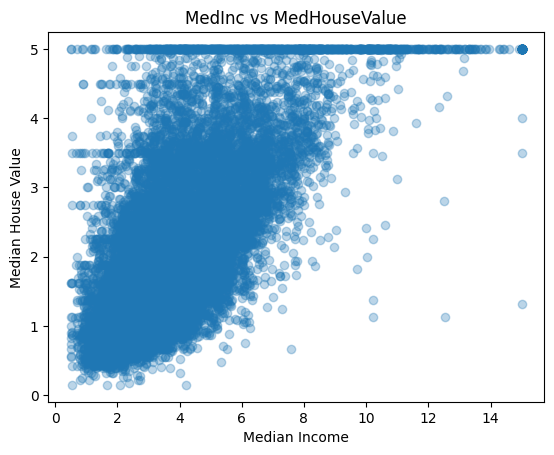

In [3]:
print(df.isna().sum())

df.describe().T

plt.scatter(df.MedInc, df.MedHouseValue, alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("MedInc vs MedHouseValue")


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (16512, 8) Test size: (4128, 8)


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

mse   = mean_squared_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)
rmse  = np.sqrt(mse)

print(f"Test MSE:  {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²:   {r2:.3f}")


Test MSE:  0.556
Test RMSE: 0.746
Test R²:   0.576


In [8]:

cv_r2  = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_mse = -cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

print("CV R² scores: ", np.round(cv_r2, 3))
print("Mean CV R²:   ", np.round(cv_r2.mean(),3))
print("CV MSE scores:", np.round(cv_mse,3))
print("Mean CV MSE:  ", np.round(cv_mse.mean(),3))


CV R² scores:  [0.549 0.468 0.551 0.537 0.661]
Mean CV R²:    0.553
CV MSE scores: [0.485 0.622 0.646 0.543 0.495]
Mean CV MSE:   0.558
